# Convoluciones imágenes de 3 canales

Hasta ahora hemos visto cómo hacer convoluciones con imágenes y filtros de una sola dimensión, pero lo normal es que las imágenes tengan más de una dimensión, así que vamos a ver cómo se hacen las convoluciones en imágenes de 3 canales

Supongamos que tenemos una imagen de 3 canales (RGB), lo que tenemos que hacer es aplicarle un filtro de 3 canales también. 

<div style="text-align:center;">
  <img src="Imagenes/Convoluci%C3%B3n%203D.png" alt="convolución 3D"> <!-- style="width:425px;height:626px;"> -->
</div>

Lo que se hace es calcular la convolución del primer canal (canal rojo de la imagen con el canal rojo del filtro), la convolcuión del segundo canal (canal verde de la imagen con el canal verde del filtro) y la convolución del tercer canal (canal azul de la imagen con el canal azul del filtro). Una vez se tengan las tres convoluciones, se suman

Al igual que antes, nosotros no elejimos los valores del filtro en cada canal, sino que son los parámetros que la red va a aprender al entrenar

## Convoluciones de imágenes de 3 canales en pytorch

Vamos a ver cómo queda una imagen de 3 canales después de hacerle una convolución. Abrimos una imagen de 3 canales

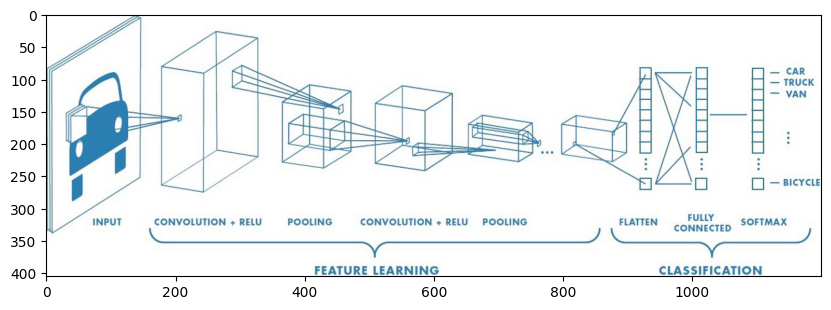

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Imagenes/CNN.jpeg')
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

La convertimos a un tensor

In [2]:
import numpy as np
import torch

array = np.array(img)
tensor = torch.from_numpy(array)
tensor.shape

torch.Size([405, 1200, 3])

Vemos que el número de canales lo tiene al final, pero Pytorch necesita que esté al inicio, así que lo cambiamos

In [3]:
tensor = tensor.permute(2, 0, 1)
tensor.shape

torch.Size([3, 405, 1200])

Añadimos el batch size

In [4]:
tensor = tensor.unsqueeze(0).type(torch.float32)
tensor.shape, tensor.dtype

(torch.Size([1, 3, 405, 1200]), torch.float32)

Definimos el kernell

In [5]:
filter = torch.tensor([[[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                        [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                        [[1, 0, -1], [1, 0, -1], [1, 0, -1]]])
print(filter)
filter = filter.unsqueeze(0).type(torch.float32)
filter.shape, filter.dtype

tensor([[[ 1,  0, -1],
         [ 1,  0, -1],
         [ 1,  0, -1]],

        [[ 1,  0, -1],
         [ 1,  0, -1],
         [ 1,  0, -1]],

        [[ 1,  0, -1],
         [ 1,  0, -1],
         [ 1,  0, -1]]])


(torch.Size([1, 3, 3, 3]), torch.float32)

In [6]:
import torch.nn.functional as F

tensor_filtered = F.conv2d(tensor, filter)
tensor_filtered.shape

torch.Size([1, 1, 403, 1198])